## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1_l2

def build_mlp(input, output,l1_ratio, l2_ratio):
    """
    Build your own model
    """
    model = Sequential()
    model.add(Dense(256,input_dim = input, activation='relu',kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio)))
    model.add(Dense(128,activation='relu', kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio)))
    model.add(Dense(64, activation='relu',kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio)))
    model.add(Dense(output, activation='softmax'))
    return model

In [6]:
LR =1e-3
epochs = 10
batch_size =256

L1 = [1e-1, 1e-4, 1e-7, 1e-10]
L2 = [1e-1, 1e-4, 1e-7, 1e-10]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

import itertools

from keras.optimizers import Adam
results = {}
for l1, l2  in zip(L1, L2):
    model = build_mlp(x_train.shape[1], y_train.shape[1],l1, l2)
    model.summary()
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=LR), metrics=["accuracy"])
    model.fit(x_train, y_train, 
              epochs=epochs, 
              batch_size=batch_size, 
              validation_split=0.2, 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    
    results[l1] = {'train-loss': train_loss,'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 6s 155us/step - loss: 277.9294 - accuracy: 0.0991 - val_loss: 14.5362 - val_accuracy: 0.1003
Epoch 2/10
40000/40000 [=====================

40000/40000 [==============================] - 5s 125us/step - loss: 1.9729 - accuracy: 0.2883 - val_loss: 1.8349 - val_accuracy: 0.3510
Epoch 2/10
40000/40000 [==============================] - 5s 120us/step - loss: 1.7632 - accuracy: 0.3730 - val_loss: 1.7714 - val_accuracy: 0.3655
Epoch 3/10
40000/40000 [==============================] - 5s 122us/step - loss: 1.6860 - accuracy: 0.4010 - val_loss: 1.6915 - val_accuracy: 0.4011
Epoch 4/10
40000/40000 [==============================] - 5s 123us/step - loss: 1.6126 - accuracy: 0.4261 - val_loss: 1.6226 - val_accuracy: 0.4299
Epoch 5/10
40000/40000 [==============================] - 5s 121us/step - loss: 1.5609 - accuracy: 0.4444 - val_loss: 1.6016 - val_accuracy: 0.4354
Epoch 6/10
40000/40000 [==============================] - 5s 122us/step - loss: 1.5324 - accuracy: 0.4550 - val_loss: 1.5756 - val_accuracy: 0.4445
Epoch 7/10
40000/40000 [==============================] - 5s 121us/step - loss: 1.4925 - accuracy: 0.4708 - val_loss: 1.534

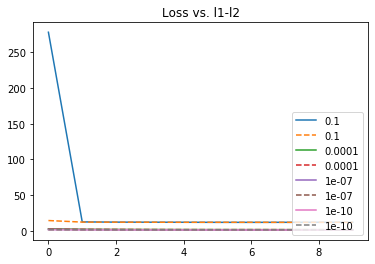

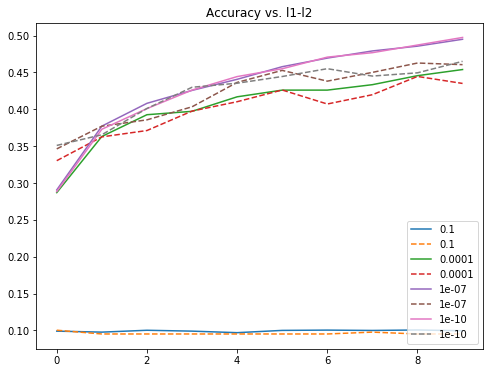

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline 
    
#NUM_COLORS = len(results.keys())
#cm = plt.get_cmap('gist_rainbow')
#color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

#plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-loss'])),results[j]['train-loss'], '-', label=j)
    plt.plot(range(len(results[j]['valid-loss'])),results[j]['valid-loss'], '--', label=j)
plt.title("Loss vs. l1-l2")
plt.legend(loc=4)
plt.show()

plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-acc'])),results[j]['train-acc'], '-', label=j)
    plt.plot(range(len(results[j]['valid-acc'])),results[j]['valid-acc'], '--', label=j)
plt.title("Accuracy vs. l1-l2")
plt.legend(loc=4)
plt.show()